# K-means: California housing

In [15]:
# Handle imports up-front
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

from utils import cross_val

ModuleNotFoundError: No module named 'dotenv'

## 1. Data loading
### 1.1. Load

In [3]:
raw_data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

### 1.2. Inspect

In [4]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 1.3. Remove unnecessary features

In [5]:
data_df=raw_data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


### 1.4. Test-train split

In [6]:
# Create train-test split
training_data, testing_data = train_test_split(data_df, test_size=0.20, random_state=42)

# Display the first few rows of the training and testing sets
print("Training Data:")
print(training_data.head())

print("\nTesting Data:")
print(testing_data.head())

Training Data:
       MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80

Testing Data:
       MedInc  Latitude  Longitude
20046  1.6812     36.06    -119.01
3024   2.5313     35.14    -119.46
15663  3.4801     37.80    -122.44
20484  5.7376     34.28    -118.72
9814   3.7250     36.62    -121.93


## 2. EDA
### 2.1. Missing, and/or extreme values

In [7]:
# The dataset is pretty clean already, and we only have three features - but it never hurts to plot a few histograms to take a look at the shape of the data
# Check for missing values
missing_values = data_df.isnull().sum()

# Print out the missing values
print("Missing values by column:")
print(missing_values)

Missing values by column:
MedInc       0
Latitude     0
Longitude    0
dtype: int64


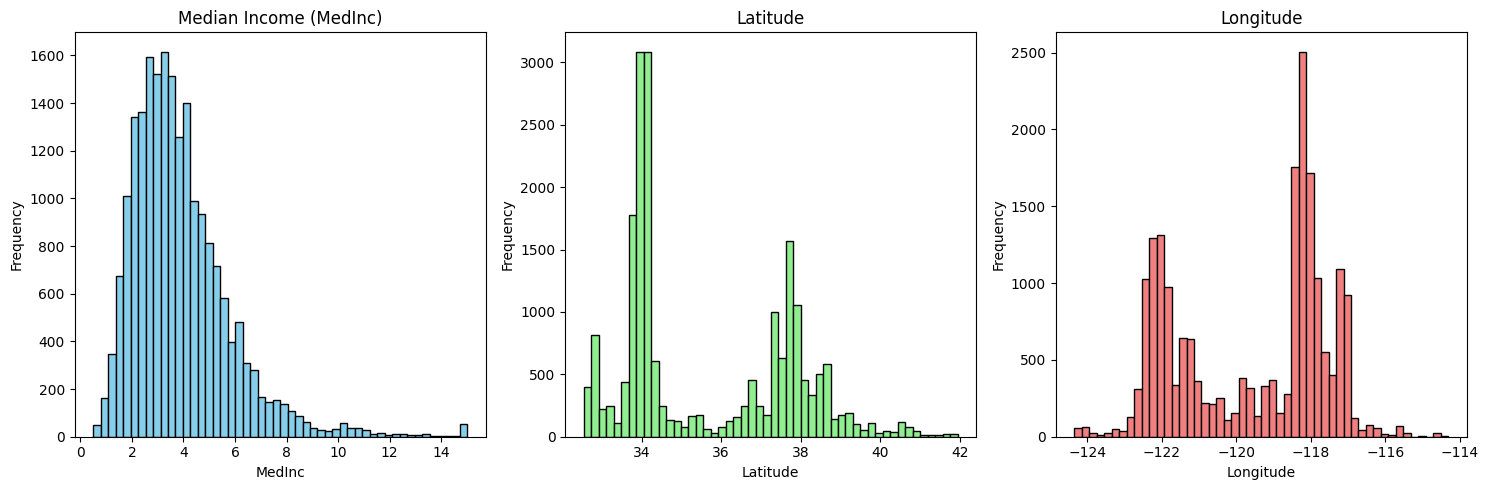

In [8]:
# Plot histograms
plt.figure(figsize=(15, 5))

# Histogram for Median Income (MedInc)
plt.subplot(1, 3, 1)
plt.hist(data_df['MedInc'], bins=50, color='skyblue', edgecolor='black')
plt.title('Median Income (MedInc)')
plt.xlabel('MedInc')
plt.ylabel('Frequency')

# Histogram for Latitude
plt.subplot(1, 3, 2)
plt.hist(data_df['Latitude'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

# Histogram for Longitude
plt.subplot(1, 3, 3)
plt.hist(data_df['Longitude'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

### 2.2. Feature scaling

In [9]:
scaler=MinMaxScaler()
scaler.fit(training_data)

scaled_training_data=scaler.transform(training_data)
scaled_training_data=pd.DataFrame(scaled_training_data, columns=training_data.columns)

scaled_testing_data=scaler.transform(testing_data)
scaled_testing_data=pd.DataFrame(scaled_testing_data, columns=testing_data.columns)

## 3. Clustering

### 3.1. Find clusters

In [10]:
# Use Scikit-learn's KMeans()
kmeans_model = KMeans(n_clusters=6, random_state=42)
training_data['cluster'] = kmeans_model.fit_predict(training_data[['Longitude', 'Latitude', 'MedInc']])

### 3.2. Add cluster label to training data

In [11]:
# Add the clusters from the KMeans model as the new label - now we have turned our unsupervised machine learning problem into a supervised one!
labels=list(kmeans_model.labels_)
scaled_training_data['cluster']=labels
scaled_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     16512 non-null  float64
 1   Latitude   16512 non-null  float64
 2   Longitude  16512 non-null  float64
 3   cluster    16512 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 451.6 KB


### 3.3. Plot results

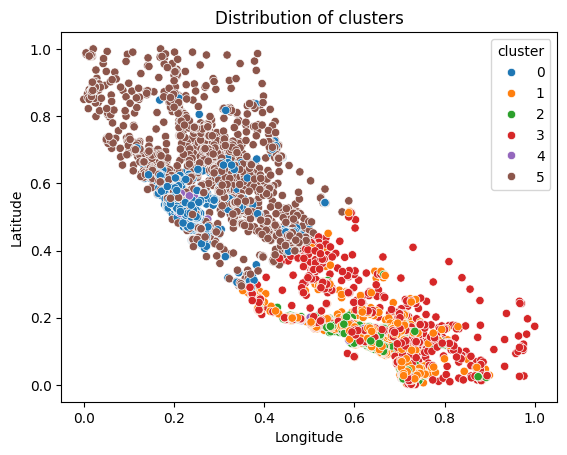

In [12]:
# If you scaled the data properly, you should notice that your clusters are much cleaner than the 4Geeks solution - which basically just cuts california in half and then stratifies it by median income because that was the feature with the largest range in values!
plt.title('Distribution of clusters')
sns.scatterplot(data=scaled_training_data, x='Longitude', y='Latitude', hue='cluster', palette='tab10')
plt.show()

## 4. Supervised classification model
### 4.1. Features & labels

In [13]:
# Re-seperate the feaurtes and labels to train a supervised classifier
labels=scaled_training_data['cluster'].reset_index(drop=True)
features=scaled_training_data.drop('cluster', axis=1).reset_index(drop=True)
features.head()

,MedInc,Latitude,Longitude
0,0.190322,0.017021,0.729084
1,0.228452,0.129787,0.616534
2,0.252162,0.224468,0.385458
3,0.099488,0.014894,0.721116
4,0.210638,0.450000,0.453187


### 4.2. Model training

In [14]:
# Pick any classification model you like
classification_model=GradientBoostingClassifier(random_state=42)
fit_result=classification_model.fit(features, labels)

### 4.3. Cross-validation

In [13]:
# You can re-use the 'cross_val' helper function we wrote for the naive bayes project here (look in src/utils.py in my copy of the repo. from the course materials repo. list).

### 4.4. Model evaluation

In [14]:
# Your code here...